In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading th dataset

data=pd.read_csv(r"C:\Users\hp\Downloads\titanic_dataset (1).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking for null values in the dataset

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Inference
There are null values in the dataset.

In [7]:
# Checking for duplicate values in the dataset

data.duplicated().sum()

0

### Inference
There are no duplicate values in the data.

In [8]:
# Filling the null values in the numerical feature column Age using median.

data['Age']=data['Age'].fillna(data['Age'].median())

# Filling the null values in the categorical feature column Embarked using mode.

data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])



In [9]:
# since there are 687 null values in the cabin column.That can be dropped.

data_new=data.drop('Cabin',axis=True)

In [10]:
data_new.set_index('PassengerId',inplace=True)
data_new # new dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [11]:
data_new.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Now there are no null values in the dataset.

In [12]:
data_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

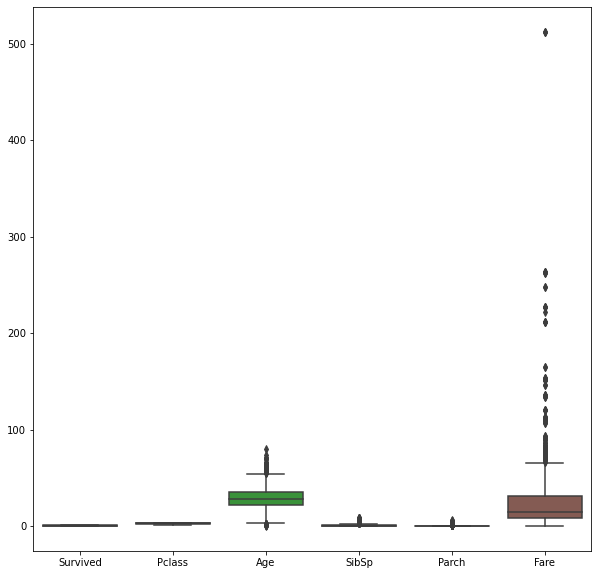

In [13]:
# Outlier detection

plt.figure(figsize=(10,10))
sns.boxplot(data=data_new)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp'>

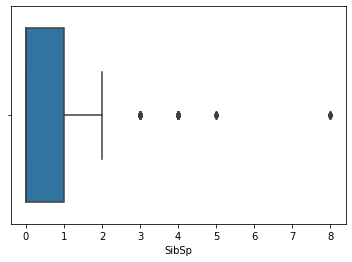

In [14]:
print(data_new['SibSp'].value_counts())
sns.boxplot(data_new['SibSp'])

#### Since the number of siblings and spouse cannot be treated as an anomaly we can consider retaining these values in the dataset.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch'>

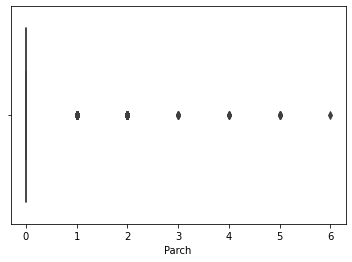

In [15]:
print(data_new['Parch'].value_counts())
sns.boxplot(data_new['Parch'])      

#### Since the number of parents and children cannot be treated as an anomaly we can retain these values in the dataset.

<AxesSubplot:>

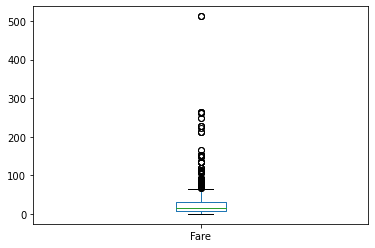

In [16]:
data_new['Fare'].plot(kind='box')


#### Since the Fare is linked to the Passenger Class that the traveller has chosen these values are genuine and cannot be treated as an outlier.

80.0


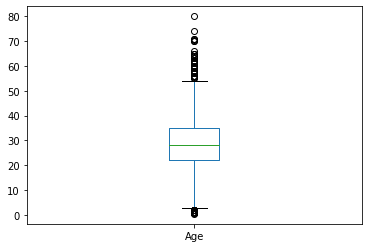

In [17]:
data_new['Age'].plot(kind='box')
print(data_new['Age'].max())

#### Since the age values are distributed between 0.4 and 80 these values are also genuine.Hence these values are retained in the dataset.

<AxesSubplot:>

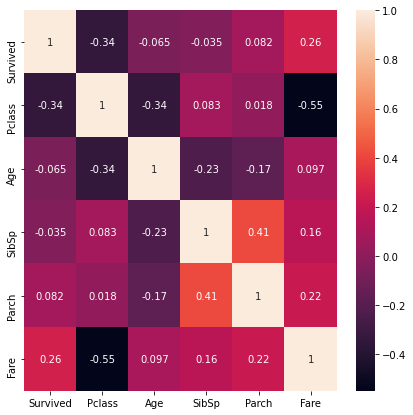

In [18]:
# correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(data_new.corr(),annot=True)

### Exploratory Data Analysis

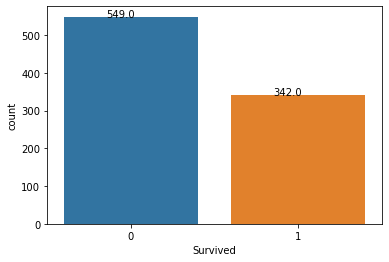

In [19]:
plot1=sns.countplot(data_new['Survived'])
for p in plot1.patches:
    plot1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.show()    

From the dataset we can conclude that 549 passengers have not survived and 342 have survived.

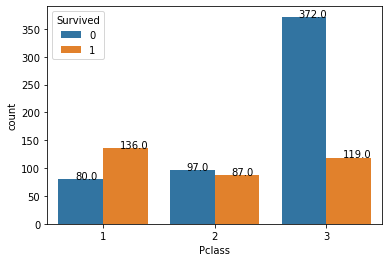

In [20]:
plot2=sns.countplot(data_new['Pclass'],hue=data_new['Survived'])
for p in plot2.patches:
    plot2.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.05))
plt.show() 

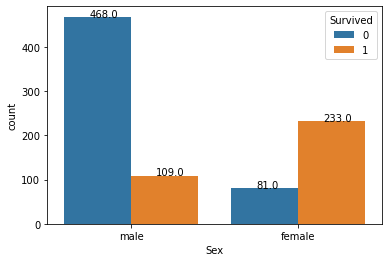

In [21]:
plot3=sns.countplot(data_new['Sex'],hue=data_new['Survived'])
for p in plot3.patches:
    plot3.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.05))
plt.show() 

<AxesSubplot:>

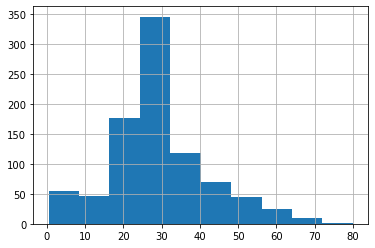

In [22]:
data_new['Age'].hist()

<AxesSubplot:>

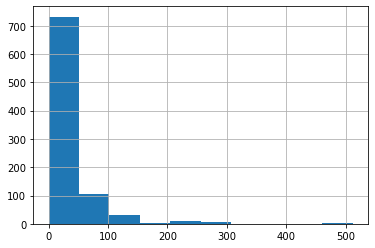

In [23]:
data_new['Fare'].hist()

### Model building

In [24]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_new[['Age','Fare']]=sc.fit_transform(data_new[['Age','Fare']])
data_new

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C
3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,S
5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.025374,S
888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.058556,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,1,2,W./C. 6607,0.045771,S


In [25]:
# splitting the data into independent features and target variable

x=data_new.drop(['Name','Ticket','Survived'],axis=1) # independent features
y=data_new['Survived'] # target feature

In [26]:
# Encoding

x=pd.get_dummies(x)

In [27]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.271174,1,0,0.014151,0,1,0,0,1
2,1,0.472229,1,0,0.139136,1,0,1,0,0
3,3,0.321438,0,0,0.015469,1,0,0,0,1
4,1,0.434531,1,0,0.103644,1,0,0,0,1
5,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,0.334004,0,0,0.025374,0,1,0,0,1
888,1,0.233476,0,0,0.058556,1,0,0,0,1
889,3,0.346569,1,2,0.045771,1,0,0,0,1


In [28]:
# To split the dataset into training dataset and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
x_train.shape

(712, 10)

In [30]:
x_test.shape

(179, 10)

### 1. Logistic Regression

In [31]:
# Importing the classifier
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()

# Fitting the dataset
log_r.fit(x_train,y_train)

#Predicting using the model
y_pred_1=log_r.predict(x_test)

# Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

# For Logistic Regression
print(classification_report(y_pred_1,y_test))
confusion_matrix(y_pred_1,y_test)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



array([[89, 20],
       [16, 54]], dtype=int64)

### 2.Decision Tree

In [32]:
# importing the classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

# Fitting the dataset
dc.fit(x_train,y_train)

# Predicting using the model
y_pred_2=dc.predict(x_test)

# Evaluating the model
print(classification_report(y_pred_2,y_test))

confusion_matrix(y_pred_2,y_test)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.77      0.72      0.75        79

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



array([[83, 17],
       [22, 57]], dtype=int64)

### 3. Random Forest

In [33]:
# Importing the classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

# Fitting the dataset
rf.fit(x_train,y_train)

# Predicting using the model
y_pred_3=rf.predict(x_test)

# Evaluating using the model
print(classification_report(y_pred_3,y_test))

confusion_matrix(y_pred_3,y_test)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



array([[88, 17],
       [17, 57]], dtype=int64)

### 4. SVM

In [34]:
# Importing the classifier
from sklearn.svm import SVC
sv=SVC()

# Fitting the dataset
sv.fit(x_train,y_train)

# Predicting using the model
y_pred_4=sv.predict(x_test)

# evaluating the model
print(classification_report(y_pred_4,y_test))

confusion_matrix(y_pred_4,y_test)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       115
           1       0.69      0.80      0.74        64

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



array([[92, 23],
       [13, 51]], dtype=int64)

### 5. KNN

In [35]:
# Importing the classifier

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

# Fitting the dataset
knn.fit(x_train,y_train)

# Predicting using the model
y_pred_5=knn.predict(x_test)

# evaluating the model
print(classification_report(y_pred_5,y_test))
confusion_matrix(y_pred_5,y_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.83       113
           1       0.70      0.79      0.74        66

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



array([[91, 22],
       [14, 52]], dtype=int64)

### 6.Naive Bayes

In [37]:
# Importing the classifier
from sklearn.naive_bayes import BernoulliNB
nv= BernoulliNB()

# Fitting the dataset
nv.fit(x_train,y_train)

# Predicting using the model
y_pred_6=nv.predict(x_test)

# Evaluating the model
print(classification_report(y_pred_6,y_test))

confusion_matrix(y_pred_6,y_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.70      0.75      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



array([[88, 22],
       [17, 52]], dtype=int64)

### Inference:
From the above models Random Forest has the highest accuarcy 83% and svm and knn have least accuarcy of 59% and 58% respectively